In [1]:
import sys
sys.path.insert(1, '/home/patryk_mscwrona/repos') # inserting a library's directory

from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np

from river import optim
from river import linear_model
from river import forest
from river import tree
from river import preprocessing
from river import metrics
from river import dummy
from river import utils
from river import drift
from river import datasets

from Fleuve.master import stream_miner_master
from Fleuve.master import evaluator_master
from Fleuve.master import predictor_master
from Fleuve.master import drift_detector_master

# initialize credit card input
from Fleuve.utils import streamer


In [19]:
type(False) == bool

True

In [16]:
float(False)

0.0

# Sea

In [2]:
sea = datasets.synth.SEA(seed = 44, variant = 0)

stream_generator = streamer.Streamer(sea)


In [3]:
#  n_in_one_file,
#     n_files,
#     gen_freq_s,
#     CACHE_PATH,
#     HDFS_PATH,

stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 80, gen_freq_s = 3, \
                                    CACHE_PATH = "/home/patryk_mscwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/sea")

#### seed = 55

In [2]:
sea = datasets.synth.SEA(seed = 55, variant = 0)

stream_generator = streamer.Streamer(sea)


In [3]:
#  n_in_one_file,
#     n_files,
#     gen_freq_s,
#     CACHE_PATH,
#     HDFS_PATH,

stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 80, gen_freq_s = 3, \
                                    CACHE_PATH = "/home/patryk_mscwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/sea")

In [9]:
for x, y in agrawal.take(10):
    print(list(x.values()), y)

[100848.08955430076, 0, 28, 1, 17, 4, 500000, 12, 273771.5502399643] 1
[35208.677258129144, 46305.21881037523, 52, 0, 9, 5, 400000, 19, 373917.65423579834] 0
[20000, 64701.40277377453, 56, 4, 18, 4, 0, 13, 331631.0207757867] 1
[127617.24938733826, 0, 64, 4, 16, 1, 800000, 30, 298429.17677031364] 0
[144352.11124286574, 0, 67, 4, 11, 8, 100000, 6, 99346.64575240412] 1
[36184.426201251124, 75000, 64, 1, 9, 8, 100000, 11, 85522.19879813484] 0
[84791.77453847603, 32647.127513925694, 69, 1, 20, 1, 800000, 17, 438026.56725796615] 1
[43774.31305442921, 29026.866243160515, 25, 1, 14, 4, 0, 29, 153657.05780785298] 0
[130422.62673785086, 0, 61, 4, 15, 7, 200000, 18, 226837.80525176442] 1
[116322.35675921818, 0, 31, 2, 2, 5, 400000, 12, 126112.86190712727] 0


In [2]:
hyperplane = datasets.synth.Hyperplane(seed = 44, n_features = 6, n_drift_features = 2, mag_change = 0.3, noise_percentage = 0.05, sigma = 0.05)

stream_generator = streamer.Streamer(hyperplane)



In [8]:
for x, y in hyperplane.take(10):
    print(list(x.values()), y)

[0.1166505334428638, 0.008805625887066904, 0.15669033508336383, 0.5137132085026757, 0.989492910377551, 0.6935102614314381] 0
[0.32611987261685993, 0.07355343057826824, 0.8415228969062091, 0.6172199559140832, 0.11200982712964758, 0.07006668737991728] 0
[0.6253169687228409, 0.9695674798615804, 0.035003329400353556, 0.38587884676317075, 0.47728097048481155, 0.9168894603146662] 1
[0.04920473727170238, 0.6737168204826979, 0.8167054405798101, 0.4363650508959722, 0.03783352478299151, 0.7135799802446153] 0
[0.830481689206348, 0.6305582035603347, 0.5899736121443088, 0.5405293863310431, 0.23326149198003665, 0.4555725007765766] 1
[0.8196139557163948, 0.839416196477519, 0.043623188718926564, 0.15726925439603556, 0.22314650478327425, 0.014588434845492881] 1
[0.994665480735883, 0.3566779610773797, 0.19904695007600748, 0.11151918292748253, 0.3401304864312761, 0.8380565138443935] 1
[0.04798165467282445, 0.6230878269221285, 0.12248957263441707, 0.17944021472715432, 0.6424485350784436, 0.835554890374815

In [4]:
stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 80, gen_freq_s = 1, \
                                    CACHE_PATH = "/home/patryk_mscwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/hyperplane")

# Agrawal with concept drift

In [ ]:
agrawal = datasets.synth.Agrawal(classification_function = 4, seed = 77, balance_classes=True, perturbation=0.1)

stream_generator = streamer.Streamer(agrawal)


In [3]:
# 50k observations - function 4
agrawal = datasets.synth.Agrawal(classification_function = 4, seed = 77, balance_classes=True, perturbation=0.1)
stream_generator = streamer.Streamer(agrawal)
stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 40, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/agrawal_cd")
# 50k observations - function 3
agrawal = datasets.synth.Agrawal(classification_function = 3, seed = 77, balance_classes=True, perturbation=0.1)
stream_generator = streamer.Streamer(agrawal)
stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 40, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/agrawal_cd")
# 50k observations - function 2
agrawal = datasets.synth.Agrawal(classification_function = 2, seed = 77, balance_classes=True, perturbation=0.1)
stream_generator = streamer.Streamer(agrawal)
stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 40, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/agrawal_cd")
# 100k observations - function 4
agrawal = datasets.synth.Agrawal(classification_function = 4, seed = 77, balance_classes=True, perturbation=0.1)
stream_generator = streamer.Streamer(agrawal)
stream_generator.generateDataStream(n_in_one_file = 2500,max_files = 80, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/agrawal_cd")

# Virtual Drift Generator

In [ ]:
# case 1 - 0-2, 0-10, 0-2

In [4]:
vd = streamer.VirtualDriftStreamer(seed = 44)

In [8]:
vd

# case 2 below for StreamMiner

In [17]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 3, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=0, u_max=10)

In [18]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 3, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=7, u_max=12)

In [19]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 3, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=0, u_max=5)

In [20]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 3, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=0, u_max=10)

In [16]:
!dir

bin	   dev	   home   lib64       media  proc  sbin  sys  var
boot	   etc	   lib	  libx32      mnt    root  snap  tmp
copyright  hadoop  lib32  lost+found  opt    run   srv	 usr


# case 3 for DRIFT DETECTOR MASTER

In [5]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=0, u_max=1)

In [6]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=1000, u_max=1010)

In [7]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=0, u_max=1)

In [8]:
vd.generateVirtualDrift(n_in_one_file = 2500,max_files = 20, gen_freq_s = 2, \
                                    CACHE_PATH = "/home/patryk_patrykwrona/cache", \
                                    HDFS_PATH = "/user/hdfs/stream/virtual_drift", u_min=10000, u_max=11000)

# ConceptDriftStream quick test - not used

In [14]:
import matplotlib.pyplot as plt
from river.datasets import synth

dataset = synth.ConceptDriftStream(
    stream=synth.SEA(seed=42, variant=0),
    drift_stream=synth.SEA(seed=42, variant=1),
    seed=1, position=500, width=200
)
xs = []
ys = []
for x, y in dataset.take(1000):
    xs.append(x[0])
    ys.append(y)

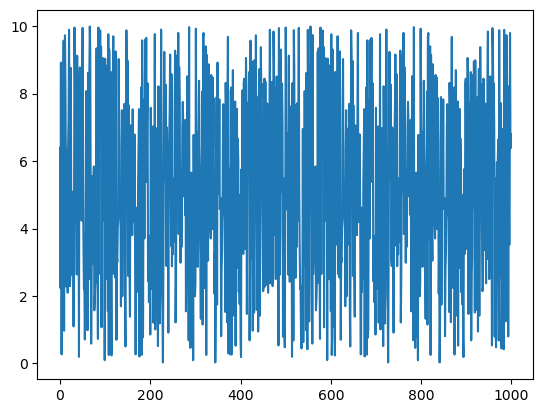

In [15]:
plt.plot( list(range(len(xs))),xs)

In [46]:
import random
from river import drift

rng = random.Random(12345)
adwin = drift.ADWIN()

# Simulate a data stream composed by two data distributions
data_stream = [rng.uniform(0, 1) for i in range(50000)] + [rng.uniform(1, 2) for i in range(50000)] + [rng.uniform(100, 102) for i in range(50000)]

# data_stream = rng.uniform()

# Update drift detector and verify if change is detected
for i, val in enumerate(data_stream):
    adwin = adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")

Change detected at index 50239, input value: 1.9442016632476364
Change detected at index 100031, input value: 101.92914571244124


In [33]:
int(False)

0

In [42]:
data_stream[999:1005]

[0.9766427630034175,
 10.125511724609407,
 11.297566833044225,
 11.946415146363996,
 10.283551738368043,
 11.118272947005485]

In [49]:
adwin.update(val)

ADWIN (
  delta=0.002
  clock=32
  max_buckets=5
  min_window_length=5
  grace_period=10
)